<a href="https://colab.research.google.com/github/Soumi7/Table_Data_Extraction/blob/main/medium_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading original image to display

In [1]:
import cv2
import matplotlib.pyplot as plt


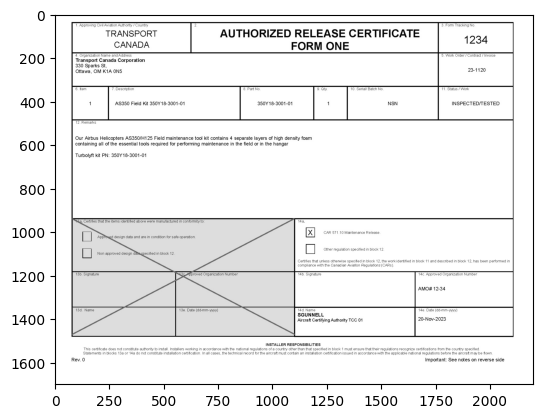

In [76]:
file=r'./FormOneSample.jpg'
img = cv2.imread(file,0)
#img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plot1 = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Inverted Image with global thresh holding

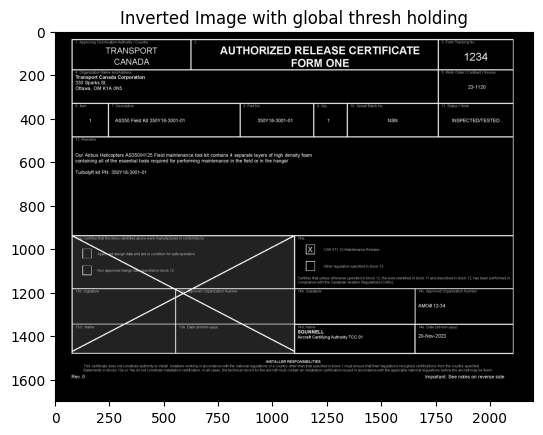

In [77]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_TOZERO)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

## Inverted Image with otsu thresh holding

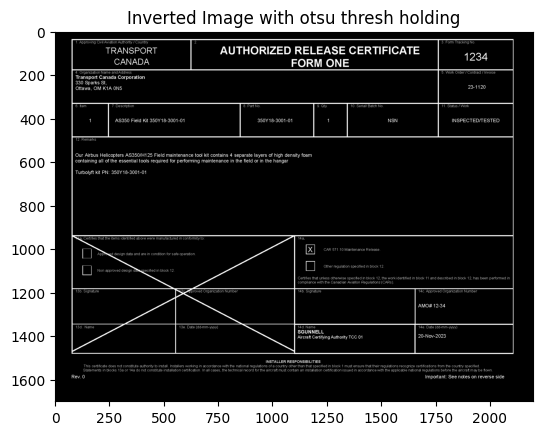

In [78]:
img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin1_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

## Inverted image with both global and Otsu thresholding

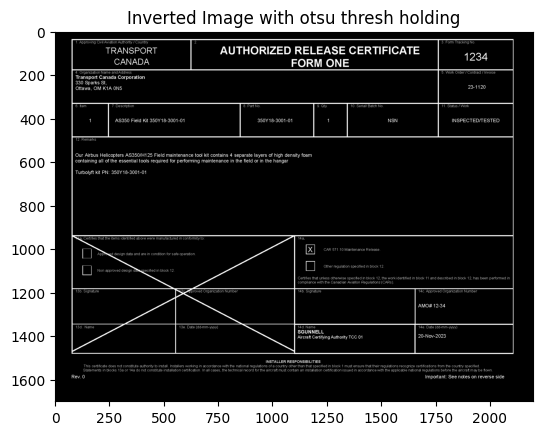

In [79]:
img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

## Create a rectangular structuring element

In [80]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
print(kernel)

[[1 1]
 [1 1]]


# Morphological Operations

## Create a new structuring element to perform erosion on the image

First we need to get the vertical lines.

We create a vertical kernel with kernel width 1 and height the number of columns in image array divided by 200.

Erosion makes the pixel 1 only if all the pixels under kernel are 1.

We perform erosion for 5 iterations with the vertical kernel.

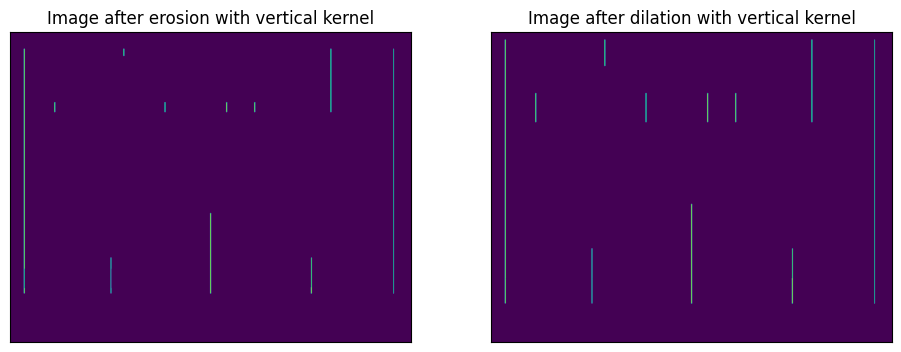

In [81]:
import numpy as np
plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=5)
plt.subplot(151),plt.imshow(eroded_image)
plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=5)
plt.subplot(152),plt.imshow(vertical_lines)
plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])

plt.show()

Dilation will make the pixel 1, if at least one of the pixels under the kernel is 1.

Similarly lets do the same with a horizontal lines to get the horizontal lines.

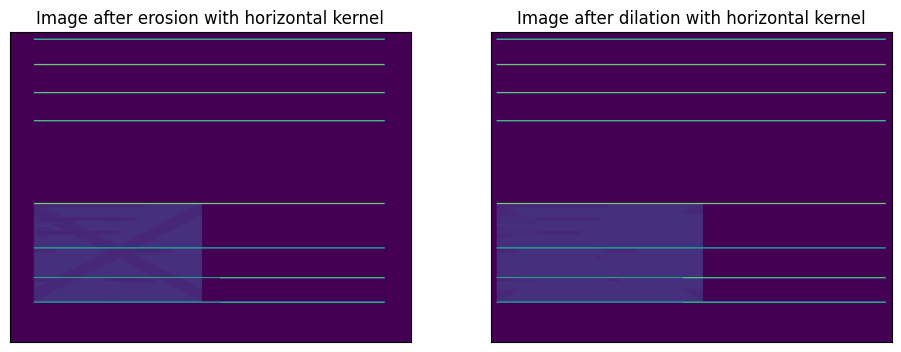

In [82]:
plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
plt.subplot(153),plt.imshow(horizontal_lines)
plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=10)
plt.subplot(154),plt.imshow(horizontal_lines)
plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

plt.show()

## Now we add the two images

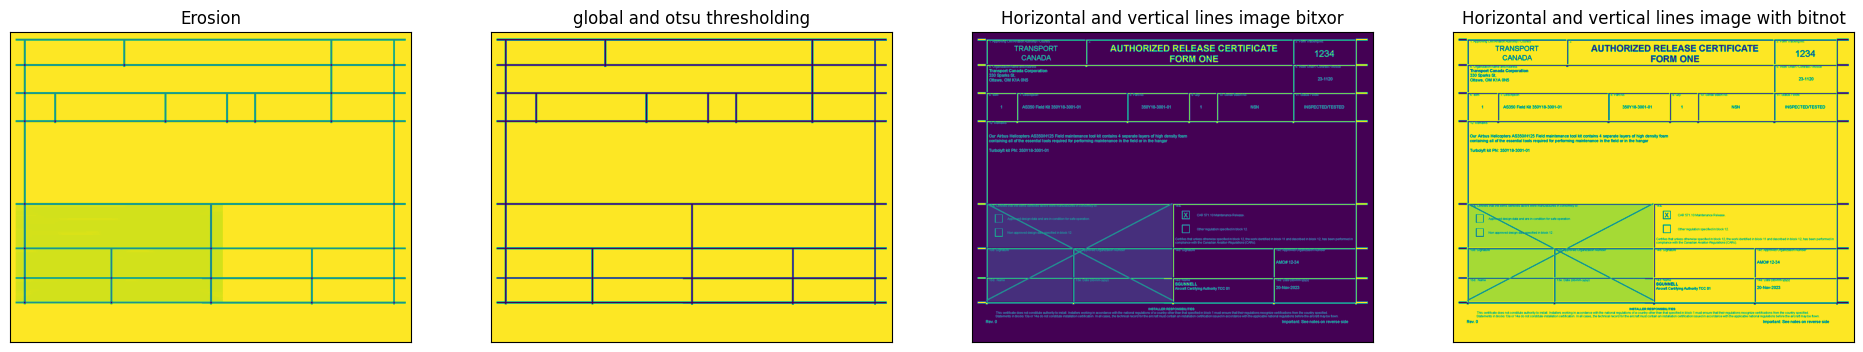

In [83]:
plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=5)
plt.subplot(151),plt.imshow(vertical_horizontal_lines)
plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(152),plt.imshow(vertical_horizontal_lines)
plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
plt.subplot(153),plt.imshow(bitxor)
plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
plt.subplot(154),plt.imshow(bitnot)
plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

plt.show()

In [84]:
import pytesseract

## Let's get the contours from the grid that we have obtained by adding the horizontal and vertical lines.

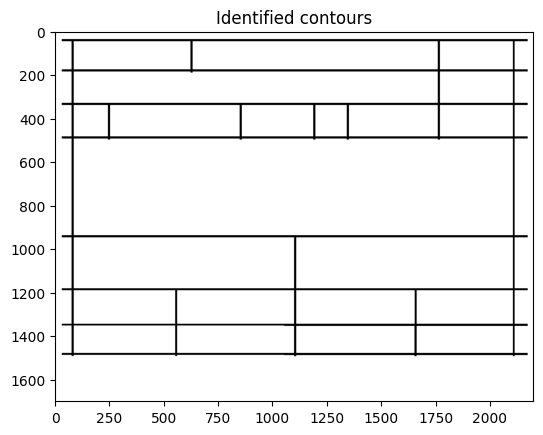

In [85]:
plotting = plt.imshow(vertical_horizontal_lines,cmap='gray')
plt.title("Identified contours")
plt.show()

In [86]:
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [87]:
 
print("Number of Contours found = " + str(len(contours))) 
  
# Draw all contours 
# -1 signifies drawing all contours 
img1 = cv2.drawContours(img, contours, -1, (0, 255, 255), 3) 
img1 = cv2.resize(img1, (1920, 1080)) 
cv2.imshow('Contours', img1) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Number of Contours found = 24


## Bounding Boxes

To get the coordinates of different boxes

In [88]:
boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
print(boundingBoxes)
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

[(0, 0, 2200, 1700), (30, 36, 2142, 1459), (1661, 1355, 442, 124), (1108, 1355, 543, 124), (561, 1353, 537, 126), (86, 1353, 466, 126), (1661, 1191, 442, 154), (1108, 1191, 544, 154), (561, 1191, 537, 154), (86, 1191, 466, 154), (1108, 948, 995, 234), (86, 948, 1012, 234), (86, 494, 2017, 444), (1768, 340, 335, 144), (1350, 340, 408, 144), (1196, 340, 144, 144), (858, 340, 328, 144), (253, 340, 595, 144), (86, 340, 157, 144), (1768, 186, 335, 144), (86, 186, 1672, 144), (1768, 47, 335, 129), (632, 47, 1126, 129), (86, 47, 536, 129)]


Here we draw the contours on our image and also store them in list boxes. It is stored as a list (x,y,w,h) : x and y beind coordinates of top left corner and w and h being width and height of the box respectively.

In [74]:
img.shape

(384, 649)

(0, 0, 2200, 1700)


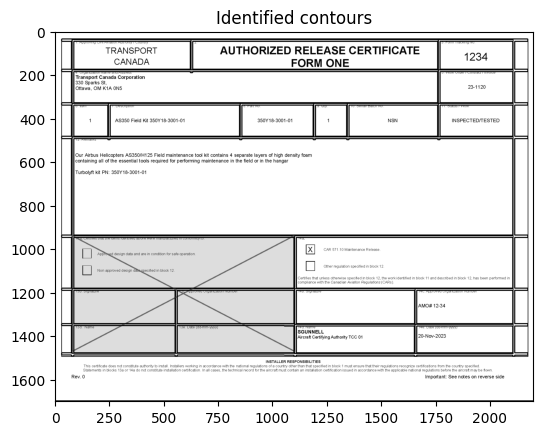

In [91]:
boxes = []
height, width = img.shape
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if ((x+w<width or y+h<height)):
      
      image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
      boxes.append([x,y,w,h,w*h])
      #print("Contour area:",w*h)
  else:
      print(cv2.boundingRect(contour))
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()
results = sorted(boxes,key=lambda x:x[2]*x[3])
#print(results)

In [92]:
sorted_boxes = sorted(boxes, key=lambda x: x[1])
print(sorted_boxes)
print(len(sorted_boxes))

row1 = sorted_boxes[1:4]
sorted_row1 = sorted(row1, key=lambda x: x[0])
print(sorted_row1)

row2 = sorted_boxes[4:6]
sorted_row2 = sorted(row2, key=lambda x: x[0])
print(sorted_row2)

row3 = sorted_boxes[6:12]
sorted_row3 = sorted(row3, key=lambda x: x[0])
print(sorted_row3)

row4 = sorted_boxes[12:13]
sorted_row4 = sorted(row4, key=lambda x: x[0])
print(sorted_row4)

row5 = sorted_boxes[13:14]
sorted_row5 = sorted(row5, key=lambda x: x[0])
print(sorted_row5)

row6 = sorted_boxes[15:17]
sorted_row6 = sorted(row6, key=lambda x: x[0])
print(sorted_row6)

row7 = sorted_boxes[21:]
sorted_row7 = sorted(row7, key=lambda x: x[0])
print(sorted_row7)

table_cells = [sorted_row1, sorted_row2, sorted_row3, sorted_row4, sorted_row5, sorted_row6, sorted_row7]
#print(table_cells)

[[30, 36, 2142, 1459, 3125178], [1768, 47, 335, 129, 43215], [632, 47, 1126, 129, 145254], [86, 47, 536, 129, 69144], [1768, 186, 335, 144, 48240], [86, 186, 1672, 144, 240768], [1768, 340, 335, 144, 48240], [1350, 340, 408, 144, 58752], [1196, 340, 144, 144, 20736], [858, 340, 328, 144, 47232], [253, 340, 595, 144, 85680], [86, 340, 157, 144, 22608], [86, 494, 2017, 444, 895548], [1108, 948, 995, 234, 232830], [86, 948, 1012, 234, 236808], [1661, 1191, 442, 154, 68068], [1108, 1191, 544, 154, 83776], [561, 1191, 537, 154, 82698], [86, 1191, 466, 154, 71764], [561, 1353, 537, 126, 67662], [86, 1353, 466, 126, 58716], [1661, 1355, 442, 124, 54808], [1108, 1355, 543, 124, 67332]]
23
[[86, 47, 536, 129, 69144], [632, 47, 1126, 129, 145254], [1768, 47, 335, 129, 43215]]
[[86, 186, 1672, 144, 240768], [1768, 186, 335, 144, 48240]]
[[86, 340, 157, 144, 22608], [253, 340, 595, 144, 85680], [858, 340, 328, 144, 47232], [1196, 340, 144, 144, 20736], [1350, 340, 408, 144, 58752], [1768, 340, 335

## Extract image from the boxes and get the contents using pytesseract

- We extract the region of interest from the image.
- For the cell we resize it, then perform morphological operations on the extracted cell area to remove noise.
- Finally, we use pytesseract to convert the image to a string.
- We append the strings in each row first to temporary string s with spaces, and then we append this temporary string to the final dataframe.

In [94]:
dataframe_final=[]
for i,row in enumerate(table_cells):
    #print(i,row)
    for j, col in enumerate(row):
        s=''
        #print(j,col)
        y,x,w,h,area = col
        #print(y,x,w,h)
        roi = bitnot[x:x+h, y:y+w]
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
        border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
        resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        dilation = cv2.dilate(resizing, kernel,iterations=1)
        erosion = cv2.erode(dilation, kernel,iterations=2)                
        out = pytesseract.image_to_string(erosion)
        if(len(out)==0):
          out = pytesseract.image_to_string(erosion)
        s = s +" "+ out
        dataframe_final.append(s)
print(dataframe_final)
        

[' 1. Approving Civil Aviation Autnonty # Country\n\nTRANSPORT\nCANADA\n', ' AUTHORIZED RELEASE CERTIFICATE\nFORM ONE\n', ' 3.Fom Iracking No.\n\n1234\n', ' 4. Organization Name and Address\nTransport Canada Corporation\n330 Sparks St,\n\nOttawa, OM K1A ON5\n', ' 9. ¥¥ork Order # Contract / Invoice\n\n23-1120\n', ' b. Item\n', ' f. Descnption\n\nAS350 Field Kit 350Y18-3001-01\n', ' 8. Part NO.\n\n350Y 18-3001-01\n', ' ¥y. Ly.\n', ' 1U. Senalé Batcn No.\n\nNSN\n', ' 11. Status # V¥orm\n\nINSPECTED/TESTED\n', ' 12. Remamks\n\nOur Airbus Helicopters AS350/H125 Field maintenance tool kit contains 4 separate layers of high density foam\ncontaining all of the essential tools required for performing maintenance in the field or in the hangar\n\nTurbolyft kit PN: 350Y18-3001-01\n', ' 14a.\nCAR 571.10 Maintenance Release.\n\nOther regulation specified in block 12.\n\n[\n\nCertifies that unless otherwise specified in block 12, the work identified in block 11 and described in block 12, has been pe

## Next we create a Numpy array from the dataframe

In [95]:
arr = np.array(dataframe_final)
arr

array([' 1. Approving Civil Aviation Autnonty # Country\n\nTRANSPORT\nCANADA\n',
       ' AUTHORIZED RELEASE CERTIFICATE\nFORM ONE\n',
       ' 3.Fom Iracking No.\n\n1234\n',
       ' 4. Organization Name and Address\nTransport Canada Corporation\n330 Sparks St,\n\nOttawa, OM K1A ON5\n',
       ' 9. ¥¥ork Order # Contract / Invoice\n\n23-1120\n', ' b. Item\n',
       ' f. Descnption\n\nAS350 Field Kit 350Y18-3001-01\n',
       ' 8. Part NO.\n\n350Y 18-3001-01\n', ' ¥y. Ly.\n',
       ' 1U. Senalé Batcn No.\n\nNSN\n',
       ' 11. Status # V¥orm\n\nINSPECTED/TESTED\n',
       ' 12. Remamks\n\nOur Airbus Helicopters AS350/H125 Field maintenance tool kit contains 4 separate layers of high density foam\ncontaining all of the essential tools required for performing maintenance in the field or in the hangar\n\nTurbolyft kit PN: 350Y18-3001-01\n',
       ' 14a.\nCAR 571.10 Maintenance Release.\n\nOther regulation specified in block 12.\n\n[\n\nCertifies that unless otherwise specified in bloc

## **Creating a dataframe from extracted data**

- We reshape our array into a dataframe with the number of rows and columns.
- Lets print out the columns and check!

In [183]:
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
import pandas as pd
dataframe = pd.DataFrame(arr.reshape(len(table_cells[0]), total_cells))
data = dataframe.style.set_properties(align="left")
#print(data)
#print(dataframe)
d=[]
for i in range(0,len(rows)):
    for j in range(0,total_cells):
        try:
            print(dataframe[i][j],end=" ")
        except:
            print("error out of range")
            
    print()

NameError: name 'total_cells' is not defined

## Printing Dataframe

In [185]:
print(dataframe)

                                                   0  1  2  3
0                   0621\n\n "TRANSPORT\nCANADA\n\n          
1   INSPECTED/TESTED\n\n . oeria atc 0.\n\nN/A\n\...         
2   CAR 571.10 Maintenance Release.\n\nOther regu...         
3                      ~ Signature\n\nAMO# 81-20\n\n         
4     €. Date (dd-mm-yyyy\n\n19-02-2022\n\n . Nam...         


#### Final task is to save this data into a csv format for further uses.

- A output.csv file is generated in google colab. You can download it.

In [186]:
dataframe.to_csv("output.csv")